In [2]:
import numpy as np

import matplotlib.pyplot as plt

from astropy import constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord

from sunpy.coordinates import spice, HeliographicStonyhurst, HeliographicCarrington
from sunpy.coordinates import get_horizons_coord
from sunpy.time import parse_time

In [13]:
#Getting the spacecraft trajectories
start_date = parse_time('2024-3-1 00:00') 

parker_trajectory_stonyhurst = get_horizons_coord('Parker Solar Probe',
                         {'start': start_date,
                          'stop': start_date + 90 * u.day,
                          'step': '180m'})

solo_trajectory_stonyhurst = get_horizons_coord('Solar Orbiter',
                         {'start': start_date,
                          'stop': start_date + 90 * u.day,
                          'step': '180m'})

#Substituted the Wind spacecraft for Earth to approximate location
earth_trajectory_stonyhurst = get_horizons_coord('Wind',
                         {'start': start_date,
                          'stop': start_date + 90 * u.day,
                          'step': '180m'})

INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Wind (spacecraft) (-8) [sunpy.coordinates.ephemeris]


In [15]:
#convert to Carrington frame and in cartesian coordinates for plotting
parker_trajectory_carrington = parker_trajectory_stonyhurst.transform_to(HeliographicCarrington(observer="self"))
parker_trajectory_carrington.representation_type = "cartesian"
parker_trajectory_stonyhurst.representation_type = 'cartesian'

solo_trajectory_carrington = solo_trajectory_stonyhurst.transform_to(HeliographicCarrington(observer="self"))
solo_trajectory_carrington.representation_type = "cartesian"
solo_trajectory_stonyhurst.representation_type = 'cartesian'

earth_trajectory_carrington = earth_trajectory_stonyhurst.transform_to(HeliographicCarrington(observer="self"))
earth_trajectory_carrington.representation_type = "cartesian"
earth_trajectory_stonyhurst.representation_type = 'cartesian'

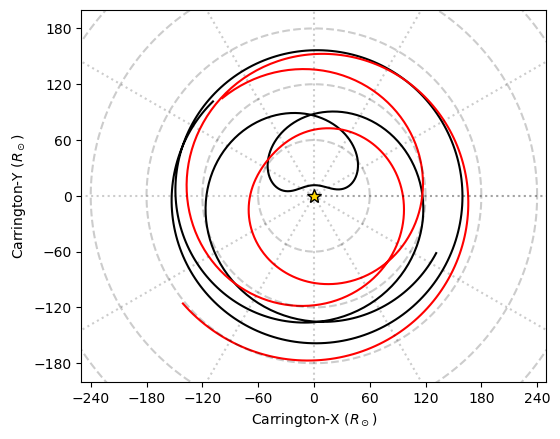

In [5]:
#Plotting trajectories in the Carrington frame

fig,ax=plt.subplots(figsize=(6,6))

#Parker Trajectory
ax.plot(parker_trajectory_carrington.x.to('Rsun'), parker_trajectory_carrington.y.to('Rsun'), 
            c='k', label='Parker Solar Probe', markersize=1)

#Solar Orbiter Trajectory
ax.plot(solo_trajectory_carrington.x.to('Rsun'), solo_trajectory_carrington.y.to('Rsun'), 
            c='r', label='Solar Orbiter', markersize=1)

rgrids = [60,120,180,240,300] 
for R_ in rgrids  :
    ax.plot(R_*np.cos(np.linspace(0,2*np.pi,200)),
            R_*np.sin(np.linspace(0,2*np.pi,200)),
            color="black",linestyle="--",alpha=0.2
           )
rmax=rgrids[-1]    
for phi in np.radians(np.linspace(0,360,13)) :
    ax.plot([0,rmax*np.cos(phi)],[0,rmax*np.sin(phi)],
            color="black",linestyle=":",alpha=0.2
           )

#Sun at the center
ax.plot(0,0, '*', markersize=10, color='gold', markeredgecolor='k')

ax.set_xlim(-250,250)
ax.set_ylim(-200,200)

ax.set_xticks(np.linspace(-240,240,9))
ax.set_yticks(np.linspace(-180,180,7))

ax.set_xlabel("Carrington-X ($R_\odot$)")
ax.set_ylabel("Carrington-Y ($R_\odot$)")

ax.set_aspect(1)

plt.show()

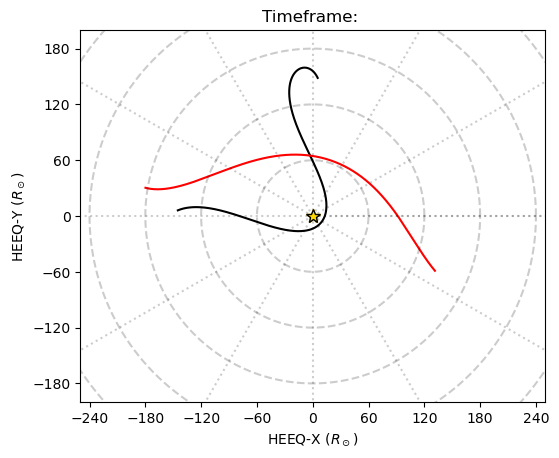

In [6]:
#Plotting trajectories in Stobyhurst coordinates
fig,ax=plt.subplots(figsize=(6,6))

#Sun at the center
ax.plot(0,0, '*', markersize=10, color='gold')

#trajectory of Parker 
ax.plot(parker_trajectory_stonyhurst.x.to('Rsun'), parker_trajectory_stonyhurst.y.to('Rsun'), 
            c='k', label='Parker Solar Probe', markersize=1)

#trajectory of Solar Orbiter 
ax.plot(solo_trajectory_stonyhurst.x.to('Rsun'), solo_trajectory_stonyhurst.y.to('Rsun'), 
            c='r', label='Solar Orbiter', markersize=1)

ax.plot(0,0, '*', markersize=10, zorder=10, color='gold', markeredgecolor='k')

rgrids = [60,120,180,240,300] 
for R_ in rgrids  :
    ax.plot(R_*np.cos(np.linspace(0,2*np.pi,200)),
            R_*np.sin(np.linspace(0,2*np.pi,200)),
            color="black",linestyle="--",alpha=0.2
           )
rmax=rgrids[-1]    
for phi in np.radians(np.linspace(0,360,13)) :
    ax.plot([0,rmax*np.cos(phi)],[0,rmax*np.sin(phi)],
            color="black",linestyle=":",alpha=0.2
           )
    
ax.set_xlim(-250,250)
ax.set_ylim(-200,200)

ax.set_xticks(np.linspace(-240,240,9))
ax.set_yticks(np.linspace(-180,180,7))

ax.set_xlabel("HEEQ-X ($R_\odot$)")
ax.set_ylabel("HEEQ-Y ($R_\odot$)")

ax.set_title('Timeframe: ')
ax.set_aspect(1)

plt.show()

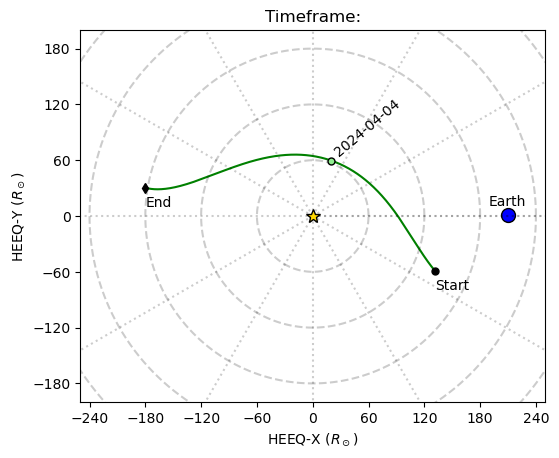

In [8]:
from scipy.signal import argrelmin

fig,ax=plt.subplots(figsize=(6,6))

ax.plot(earth_trajectory_stonyhurst.x.to('Rsun')[0], earth_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
             c='b', markeredgecolor='k', label = 'Earth', markersize=10)

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun'), solo_trajectory_stonyhurst.y.to('Rsun'),
                c='g')

ax.text(earth_trajectory_stonyhurst.x.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 
        earth_trajectory_stonyhurst.y.to('Rsun')[0].value+10*const.R_sun.to('Rsun').value, 'Earth')

rgrids = [60,120,180,240,300] 
for R_ in rgrids  :
    ax.plot(R_*np.cos(np.linspace(0,2*np.pi,200)),
            R_*np.sin(np.linspace(0,2*np.pi,200)),
            color="black",linestyle="--",alpha=0.2
           )
rmax=rgrids[-1]    
for phi in np.radians(np.linspace(0,360,13)) :
    ax.plot([0,rmax*np.cos(phi)],[0,rmax*np.sin(phi)],
            color="black",linestyle=":",alpha=0.2
           )
solo_trajectory_carrington.representation_type = "spherical"

#finds perihelion periods
s_perihelion = argrelmin(solo_trajectory_carrington.radius/u.R_sun.to('km'))[0]

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[s_perihelion], 
        solo_trajectory_stonyhurst.y.to('Rsun')[s_perihelion], 'o',
     c='lightgreen', markeredgecolor='k', markersize=5)

g = 1
for s in s_perihelion:
    ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[s].value, 
        solo_trajectory_stonyhurst.y.to('Rsun')[s].value+5*g*const.R_sun.to('Rsun').value, 
        str(solo_trajectory_carrington.obstime[s].value)[0:10], rotation=40*g, c='k', fontsize=10)
    g = g*0.9

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[0], 
        solo_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
     c='k', markersize=5)

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[-1], 
        solo_trajectory_stonyhurst.y.to('Rsun')[-1], 'd',
     c='k', markeredgecolor='k', markersize=5)

ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[0].value, 
        solo_trajectory_stonyhurst.y.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 'Start',
     c='k')

ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[-1].value, 
        solo_trajectory_stonyhurst.y.to('Rsun')[-1].value-20*const.R_sun.to('Rsun').value, 'End',
     c='k')

ax.plot(0,0, '*', markersize=10, zorder=10, color='gold', markeredgecolor='k')
ax.set_xlim(-250,250)
ax.set_ylim(-200,200)

ax.set_xticks(np.linspace(-240,240,9))
ax.set_yticks(np.linspace(-180,180,7))

ax.set_xlabel("HEEQ-X ($R_\odot$)")
ax.set_ylabel("HEEQ-Y ($R_\odot$)")

ax.set_title('Timeframe:')
ax.set_aspect(1)

# plt.savefig('context_orbits.jpg', format='jpg',transparent=True, dpi=300, bbox_inches='tight')

plt.show()

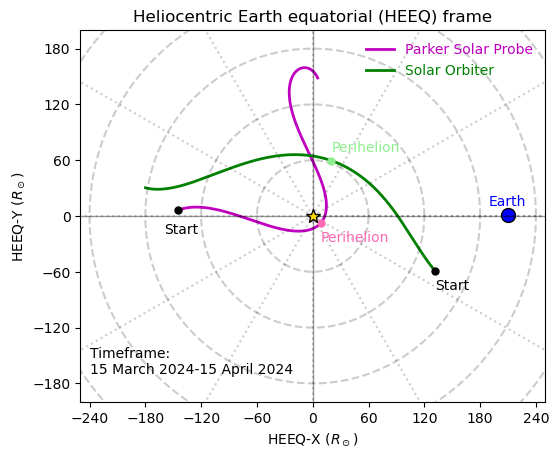

In [28]:
#Plots both Parker and Solar Orbiter trajectories as well as Earth

fig,ax=plt.subplots(figsize=(6,6))
    
#trajectory of Parker 
ax.plot(parker_trajectory_stonyhurst.x.to('Rsun'), parker_trajectory_stonyhurst.y.to('Rsun'),
            c='m', label='Parker Solar Probe', linewidth=2)

#trajectory of Solar Orbiter 
ax.plot(solo_trajectory_stonyhurst.x.to('Rsun'), solo_trajectory_stonyhurst.y.to('Rsun'),
         c='g', label='Solar Orbiter', linewidth=2)

plt.legend(frameon=False, labelcolor='linecolor')

#trajectory of Earth 
ax.plot(earth_trajectory_stonyhurst.x.to('Rsun')[0], earth_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
         c='b', label = 'Earth', markersize=10, markeredgecolor='k')
#Earth name
ax.text(earth_trajectory_stonyhurst.x.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 
earth_trajectory_stonyhurst.y.to('Rsun')[0].value+10*const.R_sun.to('Rsun').value, 'Earth', c='b')

ax.plot(0,0, '*', markersize=10, zorder=10, color='gold', markeredgecolor='k')
    
ax.set_xlabel("HEEQ-X ($R_\odot$)")
ax.set_ylabel("HEEQ-Y ($R_\odot$)")
#ax.legend()

ax.axhline(0,color="black",linewidth=1,alpha=0.4)
ax.axvline(0,color="black",linewidth=1,alpha=0.4)
ax.set_aspect(1)

rgrids = [60,120,180,240,300] 
for R_ in rgrids  :
    ax.plot(R_*np.cos(np.linspace(0,2*np.pi,200)),
            R_*np.sin(np.linspace(0,2*np.pi,200)),
            color="black",linestyle="--",alpha=0.2
           )
rmax=rgrids[-1]    
for phi in np.radians(np.linspace(0,360,13)) :
    ax.plot([0,rmax*np.cos(phi)],[0,rmax*np.sin(phi)],
            color="black",linestyle=":",alpha=0.2
           )
    
ax.plot(parker_trajectory_stonyhurst.x.to('Rsun')[0], parker_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
        c='k', markersize=5)

parker_trajectory_carrington.representation_type = "spherical"

p_min = np.argmin(parker_trajectory_carrington.radius/u.R_sun.to('km'))

ax.plot(parker_trajectory_stonyhurst.x.to('Rsun')[p_min], 
        parker_trajectory_stonyhurst.y.to('Rsun')[p_min], 'o',
        c='hotpink', markersize=5)

ax.text(parker_trajectory_stonyhurst.x.to('Rsun')[p_min].value, 
        parker_trajectory_stonyhurst.y.to('Rsun')[p_min].value-20*const.R_sun.to('Rsun').value, 'Perihelion',
     c='hotpink')

ax.text(parker_trajectory_stonyhurst.x.to('Rsun')[0].value-15*const.R_sun.to('Rsun').value, 
        parker_trajectory_stonyhurst.y.to('Rsun')[0].value-25*const.R_sun.to('Rsun').value, 'Start',
     c='k')

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[0], solo_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
     c='k', markersize=5)

solo_trajectory_carrington.representation_type = "spherical"

s_min = np.argmin(solo_trajectory_carrington.radius/u.R_sun.to('km'))

ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[s_min], 
        solo_trajectory_stonyhurst.y.to('Rsun')[s_min], 'o',
     c='lightgreen', markersize=5)

ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[s_min].value, 
        solo_trajectory_stonyhurst.y.to('Rsun')[s_min].value+10*const.R_sun.to('Rsun').value, 'Perihelion',
     c='lightgreen')

ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[0].value, 
        solo_trajectory_stonyhurst.y.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 'Start',
     c='k')


ax.set_xlim(-250,250)
ax.set_ylim(-200,200)

ax.set_xticks(np.linspace(-240,240,9))
ax.set_yticks(np.linspace(-180,180,7))

ax.text(-240,-170, 'Timeframe: \n15 March 2024-15 April 2024')
ax.set_title('Heliocentric Earth equatorial (HEEQ) frame')

# plt.savefig('context_spacecraft_config_HEEQ.png', format='png', dpi=500, transparent=True)
plt.show()

In [25]:
##Creates individual frames to create a mp4. Create a folder to store the frames called 'Trajectory_frames'.
##Once you are done creating the frames, use the line of code below in your terminal within the Trajectory_frames folder to create an *.mp4 movie 

##ffmpeg -framerate 5 -pattern_type glob -i './*.jpg' -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -c:v libx264 -pix_fmt yuv420p output.mp4


# View from above of the ecliptic plane with the orbiter of Parker, Solar Orbiter and Earth

parker_trajectory_stonyhurst.representation_type = 'cartesian'
solo_trajectory_stonyhurst.representation_type = 'cartesian'
earth_trajectory_stonyhurst.representation_type = 'cartesian'

for k in range(0, len(parker_trajectory_stonyhurst), 30):
    fig,ax=plt.subplots(figsize=(6,6))
    
    #trajectory of Parker 
    ax.plot(parker_trajectory_stonyhurst.x.to('Rsun'), parker_trajectory_stonyhurst.y.to('Rsun'),
                c='m', label='Parker', linewidth=2)

    #trajectory of Solar Orbiter 
    ax.plot(solo_trajectory_stonyhurst.x.to('Rsun'), solo_trajectory_stonyhurst.y.to('Rsun'),
             c='g', label='Solar Orbiter', linewidth=2)
    
    # plt.legend(frameon=False, labelcolor='linecolor')

    #trajectory of Earth 
    ax.plot(earth_trajectory_stonyhurst.x.to('Rsun')[0], earth_trajectory_stonyhurst.y.to('Rsun')[0], 'o',
             c='b', label = 'Earth', markersize=10)
    
    #Earth name
    ax.text(earth_trajectory_stonyhurst.x.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 
        earth_trajectory_stonyhurst.y.to('Rsun')[0].value+10*const.R_sun.to('Rsun').value, 'Earth', c='b')
    
    ax.text(-245,-175, str(parker_trajectory_stonyhurst.obstime[k].value)+' UTC', c='k')

    solo_trajectory_carrington.representation_type = "spherical"

    s_perihleion = np.argmin(solo_trajectory_carrington.radius/u.R_sun.to('km'))

    ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[s_perihelion], 
        solo_trajectory_stonyhurst.y.to('Rsun')[s_perihelion], 'o',
     c='lightgreen', markersize=5)

    parker_trajectory_carrington.representation_type = "spherical"

    s_perihelion = np.argmin(parker_trajectory_carrington.radius/u.R_sun.to('km'))

    ax.plot(parker_trajectory_stonyhurst.x.to('Rsun')[s_perihelion], 
        parker_trajectory_stonyhurst.y.to('Rsun')[s_perihelion], 'o',
        c='hotpink', markersize=5)

    ax.text(parker_trajectory_stonyhurst.x.to('Rsun')[0].value-15*const.R_sun.to('Rsun').value-30, 
        parker_trajectory_stonyhurst.y.to('Rsun')[0].value-25*const.R_sun.to('Rsun').value, 'Parker Solar Probe',
     c='magenta')

    ax.text(solo_trajectory_stonyhurst.x.to('Rsun')[0].value-30, 
        solo_trajectory_stonyhurst.y.to('Rsun')[0].value-20*const.R_sun.to('Rsun').value, 'Solar Orbiter',
     c='green')

    ax.plot(0,0, '*', markersize=10, zorder=10, color='gold', markeredgecolor='k')
    

    ax.set_xlabel("HEEQ-X ($R_\odot$)")
    ax.set_ylabel("HEEQ-Y ($R_\odot$)")
    #ax.legend()

    ax.axhline(0,color="black",linewidth=1,alpha=0.4)
    ax.axvline(0,color="black",linewidth=1,alpha=0.4)
    ax.set_aspect(1)

    rgrids = [60,120,180,240,300] 
    for R_ in rgrids  :
        ax.plot(R_*np.cos(np.linspace(0,2*np.pi,200)),
                R_*np.sin(np.linspace(0,2*np.pi,200)),
                color="black",linestyle="--",alpha=0.2
               )
    rmax=rgrids[-1]    
    for phi in np.radians(np.linspace(0,360,13)) :
        ax.plot([0,rmax*np.cos(phi)],[0,rmax*np.sin(phi)],
                color="black",linestyle=":",alpha=0.2
               )
    ax.set_xlim(-250,250)
    ax.set_ylim(-200,200)

    ax.set_xticks(np.linspace(-240,240,9))
    ax.set_yticks(np.linspace(-180,180,7))

    ax.plot(parker_trajectory_stonyhurst.x.to('Rsun')[k], parker_trajectory_stonyhurst.y.to('Rsun')[k], 'o',
            markeredgecolor='k', c='hotpink',  markersize=5)

    ax.plot(solo_trajectory_stonyhurst.x.to('Rsun')[k], solo_trajectory_stonyhurst.y.to('Rsun')[k], 'o',
         markeredgecolor='k', c='lightgreen', markersize=5)

    filename_fig = f'{k:04d}'
    plt.savefig('Trajectory_frames/Traj_'+filename_fig+'.jpg', format='jpg',transparent=True, dpi=300, bbox_inches='tight')
    
    plt.clf()

plt.show()

/var/folders/1f/3h90nmwj47jcvw1ddpbm8f880000gp/T/ipykernel_86170/200683066.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(6,6))


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>